In [181]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [198]:
ratings = pd.read_csv("ratings.txt", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
movies = pd.read_csv("movies.txt", sep="|", usecols=[0,1], names=["movie_id","title"])

In [199]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [200]:
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [201]:
transformed_ratings = ratings.pivot(index='movie_id',columns='user_id',values='rating')
transformed_ratings = transformed_ratings.fillna(0)

In [202]:
transformed_ratings

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.0,0.0,0.0,0.0,0.0,2.0,5.0,3.0,4.0,4.0,...,0.0,0.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
9,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,4.0,...,0.0,1.0,4.0,5.0,3.0,5.0,3.0,0.0,0.0,3.0


# Clustering

In [187]:
transformed_ratings.iloc[:,0:944]

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.0,0.0,0.0,0.0,0.0,2.0,5.0,3.0,4.0,4.0,...,0.0,0.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
9,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,4.0,...,0.0,1.0,4.0,5.0,3.0,5.0,3.0,0.0,0.0,3.0


In [188]:
def init_cluster_centroids(data, n):
    cluster_centroids = data.sample(n=n).values
    return cluster_centroids

In [189]:
cent = init_cluster_centroids(transformed_ratings,4)

In [190]:
def calc_nearest_centroid(centroids, data):
    #print("classifying centroids")
    #create the nw centroid distances
    col_names = []
    for i in range(len(centroids)):
        s = "distance_"+str(i)
        col_names.append(s)
        data[s] = data.iloc[:,0:943].sub(centroids[i][0:943]).pow(2).sum(1).pow(0.5)
    data["centroid"] = data[col_names].idxmin(axis=1)

In [191]:
calc_nearest_centroid(cent, transformed_ratings)

In [192]:
transformed_ratings

user_id,1,2,3,4,5,6,7,8,9,10,...,939,940,941,942,943,distance_0,distance_1,distance_2,distance_3,centroid
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,0.0,0.0,5.0,0.0,0.0,83.618180,83.922583,84.782074,84.923495,distance_0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,38.379682,41.521079,38.301436,38.639358,distance_2
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,32.280025,34.713110,30.983867,31.368774,distance_2
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,0.0,2.0,0.0,0.0,0.0,53.394756,52.019227,53.113087,53.413481,distance_1
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,32.572995,35.524639,31.733263,31.921779,distance_2
6,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,22.627417,26.962938,19.390719,20.000000,distance_2
7,4.0,0.0,0.0,0.0,0.0,2.0,5.0,3.0,4.0,4.0,...,0.0,4.0,4.0,0.0,0.0,77.291655,76.216796,77.678826,77.833155,distance_1
8,1.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,60.761830,59.405387,60.893349,60.827625,distance_1
9,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,4.0,...,5.0,3.0,0.0,0.0,3.0,69.397406,68.256868,69.742383,69.914233,distance_1


In [193]:
def calc_new_centroids(centroids, data):
    cluster_centroids = []
    for i in range(len(centroids)):
        s = "distance_"+str(i)
        sub_data = (data[data["centroid"] == s]).iloc[:,0:943]
        if(sub_data.shape[0] == 0):
            cluster_centroids.append(init_cluster_centroids(data, 1)[0].iloc[:,0:943])
        else:
            cluster_centroids.append(sub_data.mean(axis=0))
    return cluster_centroids

In [194]:
def calc_score(centroids, data):
    score = 0
    for i in range(len(centroids)):
        s = "distance_"+str(i)
        sub_data = (data[data["centroid"] == s]).iloc[:,0:943]
        score+=((sub_data-centroids[i][0:943]) ** 2).sum().sum()
    return score

In [195]:
def cluster(data, n):
    centroids = init_cluster_centroids(data, n)
    calc_nearest_centroid(centroids,data)
    start_score = calc_score(centroids,data)
    new_score = start_score
    iteration = 0
    start=1
    while((start or (start_score>new_score))):
        iteration+=1
        start_score = new_score
        print("iteration:"+str(iteration), start_score)
        start = 0
        centroids = calc_new_centroids(centroids, data)
        calc_nearest_centroid(centroids,data)
        new_score = calc_score(centroids,data)
    return new_score

In [196]:
cluster(transformed_ratings, 4)

iteration:1 1574323.0
iteration:2 1574323.0
iteration:3 1012204.1576563829
iteration:4 981949.8414217414
iteration:5 969588.597825725
iteration:6 962780.4961843971
iteration:7 959131.2030224494
iteration:8 956636.3686481796
iteration:9 955340.5286263591
iteration:10 955109.3587260507
iteration:11 955000.4597141864
iteration:12 954985.0295772861


954982.8454002563

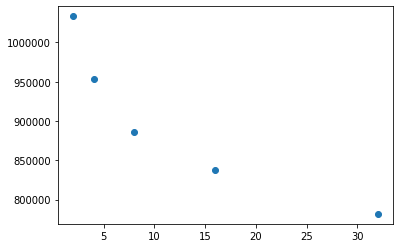

In [203]:
inertia = []
for i in range(1,6):
    kmeans = KMeans(n_clusters=2**i)
    kmeans.fit(transformed_ratings)
    inertia.append(kmeans.inertia_)
    y_kmeans = kmeans.predict(transformed_ratings)
    #print(y_kmeans)
plt.scatter([2,4,8,16,32],inertia)
plt.show()

In [204]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(transformed_ratings)
y_kmeans = kmeans.predict(transformed_ratings)
transformed_ratings["group"] = y_kmeans
for j in range(0,8):
    print("cluster - "+str(j))
    for i in transformed_ratings.loc[transformed_ratings['group'] == j].drop(columns=['group']).mean(axis=1).nlargest(n=5).index.values:
        print(str(i)+" "+movies.loc[movies['movie_id'] == i].title.values[0])
    print()

cluster - 0
191 Amadeus (1984)
357 One Flew Over the Cuckoo's Nest (1975)
483 Casablanca (1942)
135 2001: A Space Odyssey (1968)
132 Wizard of Oz, The (1939)

cluster - 1
9 Dead Man Walking (1995)
15 Mr. Holland's Opus (1995)
276 Leaving Las Vegas (1995)
275 Sense and Sensibility (1995)
25 Birdcage, The (1996)

cluster - 2
242 Kolya (1996)
259 George of the Jungle (1997)
324 Lost Highway (1997)
343 Alien: Resurrection (1997)
306 Mrs. Brown (Her Majesty, Mrs. Brown) (1997)

cluster - 3
88 Sleepless in Seattle (1993)
651 Glory (1989)
403 Batman (1989)
230 Star Trek IV: The Voyage Home (1986)
419 Mary Poppins (1964)

cluster - 4
515 Boot, Das (1981)
83 Much Ado About Nothing (1993)
582 Piano, The (1993)
86 Remains of the Day, The (1993)
223 Sling Blade (1996)

cluster - 5
258 Contact (1997)
286 English Patient, The (1996)
288 Scream (1996)
300 Air Force One (1997)
294 Liar Liar (1997)

cluster - 6
174 Raiders of the Lost Ark (1981)
98 Silence of the Lambs, The (1991)
56 Pulp Fiction (1994

In [56]:
transformed_ratings.loc[transformed_ratings['group'] == 0].drop(columns=['group']).mean(axis=1)

movie_id
10      0.361612
13      0.667020
14      0.769883
19      0.289502
20      0.260870
26      0.267232
30      0.154825
32      0.325557
45      0.343584
52      0.363733
57      0.169671
59      0.357370
60      0.272534
61      0.241782
76      0.195122
93      0.442206
114     0.316013
116     0.506893
124     0.803818
126     0.391304
129     0.522800
131     0.375398
137     0.707317
152     0.316013
160     0.253446
162     0.399788
163     0.346766
165     0.278897
166     0.253446
169     0.558855
          ...   
724     0.281018
727     0.231177
736     0.325557
737     0.186638
744     0.337222
770     0.204666
778     0.286320
792     0.339343
813     0.231177
836     0.103924
847     0.217391
855     0.260870
856     0.146341
919     0.386002
921     0.194062
923     0.255567
942     0.166490
945     0.166490
949     0.251326
955     0.177094
956     0.176034
963     0.186638
971     0.132556
1020    0.144221
1021    0.153765
1039    0.382821
1050    0.166490
1065 

In [46]:
transformed_ratings.loc[transformed_ratings['group'] == 1].drop(columns=['group']).mean(axis=0).nlargest(n=3).index.values

array([655, 13, 393], dtype=object)

In [47]:
transformed_ratings.loc[transformed_ratings['group'] == 2].drop(columns=['group']).mean(axis=0).nlargest(n=3).index.values

array([276, 416, 303], dtype=object)

In [48]:
transformed_ratings.loc[transformed_ratings['group'] == 3].drop(columns=['group']).mean(axis=0).nlargest(n=3).index.values

array([416, 276, 178], dtype=object)

In [49]:
transformed_ratings.loc[transformed_ratings['group'] == 4].drop(columns=['group']).mean(axis=0).nlargest(n=3).index.values

array([489, 863, 416], dtype=object)

In [50]:
transformed_ratings.loc[transformed_ratings['group'] == 5].drop(columns=['group']).mean(axis=0).nlargest(n=3).index.values

array([7, 846, 450], dtype=object)

In [51]:
transformed_ratings.loc[transformed_ratings['group'] == 6].drop(columns=['group']).mean(axis=0).nlargest(n=3).index.values

array([457, 7, 416], dtype=object)

In [52]:
transformed_ratings.loc[transformed_ratings['group'] == 7].drop(columns=['group']).mean(axis=0).nlargest(n=3).index.values

array([1, 96, 276], dtype=object)

In [53]:
transformed_ratings

user_id,1,2,3,4,5,6,7,8,9,10,...,935,936,937,938,939,940,941,942,943,group
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,7
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,4.0,0.0,0.0,0.0,0.0,2.0,5.0,3.0,4.0,4.0,...,0.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0,3
8,1.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6
9,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,4.0,...,1.0,4.0,5.0,3.0,5.0,3.0,0.0,0.0,3.0,3


# Matrix factorization

In [18]:
import numpy as np
from implicit.datasets.movielens import get_movielens
from implicit.bpr import BayesianPersonalizedRanking

In [21]:
titles, ratings = get_movielens("100k")

In [43]:
model = BayesianPersonalizedRanking(factors=100, iterations=1000)

In [23]:
ratings.eliminate_zeros()
ratings.data = np.ones(len(ratings.data))

In [44]:
model.fit(ratings)

100%|██████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.96it/s, correct=99.21%, skipped=30.21%]


In [ ]:
Parameters
    ----------
    factors : int, optional
        The number of latent factors to compute
    learning_rate : float, optional
        The learning rate to apply for SGD updates during training
    regularization : float, optional
        The regularization factor to use
    dtype : data-type, optional
        Specifies whether to generate 64 bit or 32 bit floating point factors
    iterations : int, optional
        The number of training epochs to use when fitting the data
    verify_negative_samples: bool, optional
        When sampling negative items, check if the randomly picked negative item has actually
        been liked by the user. This check increases the time needed to train but usually leads
        to better predictions.
    num_threads : int, optional
        The number of threads to use for fitting the model. This only
        applies for the native extensions. Specifying 0 means to default
        to the number of cores on the machine.
    random_state : int, RandomState or None, optional
        The random state for seeding the initial item and user factors.
        Default is None.

In [25]:
model.item_factors

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 8.4093638e-02, -7.1515039e-02, -3.0311771e-02, ...,
         1.1334139e-01,  3.3382034e-01,  1.4307743e+00],
       [ 8.3668411e-02,  7.1197890e-02, -1.2085638e-01, ...,
        -3.9113685e-03,  2.1361400e-01, -2.0183395e-01],
       ...,
       [-9.6888624e-02,  5.7785545e-02,  2.3145935e-02, ...,
        -1.2144799e-02, -9.5760405e-02,  7.6021524e-03],
       [-7.0133375e-04, -1.9496749e-03, -1.5095036e-03, ...,
        -1.8494619e-02,  8.5598892e-03, -1.4158171e-01],
       [ 1.5679697e-02,  5.0294790e-02, -6.6313714e-02, ...,
         1.2049257e-04,  2.0176960e-02,  4.0497173e-02]], dtype=float32)

In [94]:
model.user_factors

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.3133687 ,  0.08510856, -0.20867029, ..., -0.15422823,
        -0.4555563 ,  1.        ],
       [-0.03406733,  0.00516026,  0.44776568, ...,  0.06909866,
        -0.16997644,  1.        ],
       ...,
       [-0.6026919 ,  0.5044627 , -0.23541522, ...,  0.08367175,
        -0.39990476,  1.        ],
       [ 0.5730468 ,  0.22092055,  0.02815086, ..., -0.53293467,
         0.41202977,  1.        ],
       [-0.01812215,  0.09609829,  0.7240832 , ...,  0.05335064,
         0.10945679,  1.        ]], dtype=float32)

In [99]:
np.dot(model.item_factors[234], model.user_factors[7])

3.1404195